# Lesson 2: Analyzing Spatial Data

## Sections:

1. [Creating a Map Display](#step_1)
2. [Viewing Data Accurately](#step_2)
3. [Selecting Data and Attributes](#step_3)
4. [Larger Datasets and Data Queries](#step_4)
5. [Using Spatial Query tools](#step_5)


- [Suggested Readings](#readings)
- [References](#references)

# <a id='step_1'></a>

## Step 1: Creating a Map Display

In this example we will open a number of vector layers and begin to look at how we can anaylis and extract information out of the data.

Firstly, initiate **Adding New Vector Layer** by which ever means you prefer now (methods shown in Lesson_1.ipynb).

Next navigate to **Exercise1/data** and select:

1. States_Boundaries.shp
2. NWS_CWA_Boundaries.shp
3. Insterstates.shp
4. US_Cities.shp
5. Tornado_tracks.shp


These can all be selected at the same time by **ctrl+Cick**, but if you have low powered machine or have encountered the program crashing, then select each layer individually and allow it to render before adding the next layer. 

You should have a screen that looks similar to the image below. *However*, do not worry about the colour rendering for each layer; the colours assigned to each layer are purely arbitary and are completly costomizable, as we will see soon.

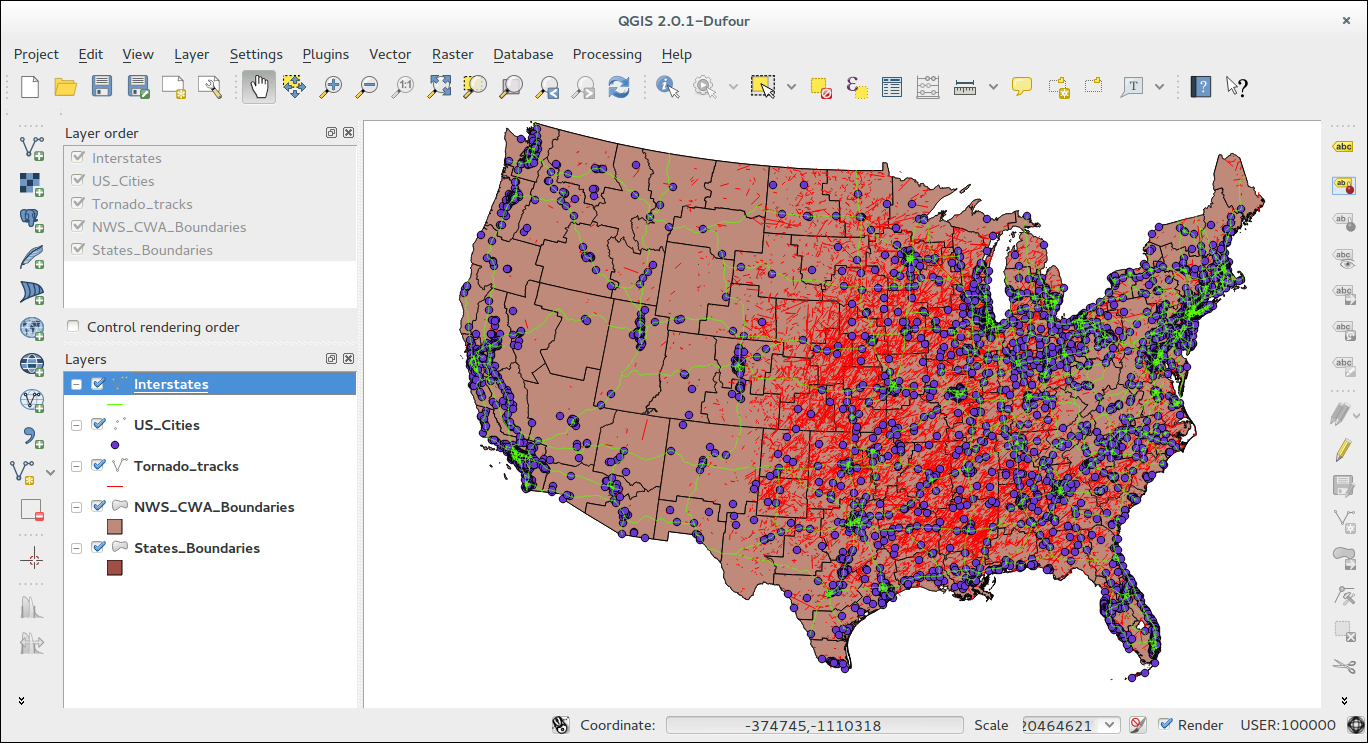

In [15]:
from IPython.display import Image
Image(filename='Images/lesson2_1.png')

To ensure the map is accurate and that the CRS (Coordinate Reference System) is set correctly, Untick the boxes representing each layer in the **Layers** panel, aside from **States_Boundaires**. If we measure the width of Kansas we should get a result of approx 380 +/- 10 miles.

(**Note:** This is a quick and dirty way to test your projection but be very carefull: Wikipeadia contains *Incorrect* values for this measurement; it would appear there has been a mile-to-kilometer conversion mistake made on the Kansas wiki page. Even though most websites will state a value of approx 411 miles, for this exercies and way the CRS has been preset, we should be looking for a value around 380 miles.)

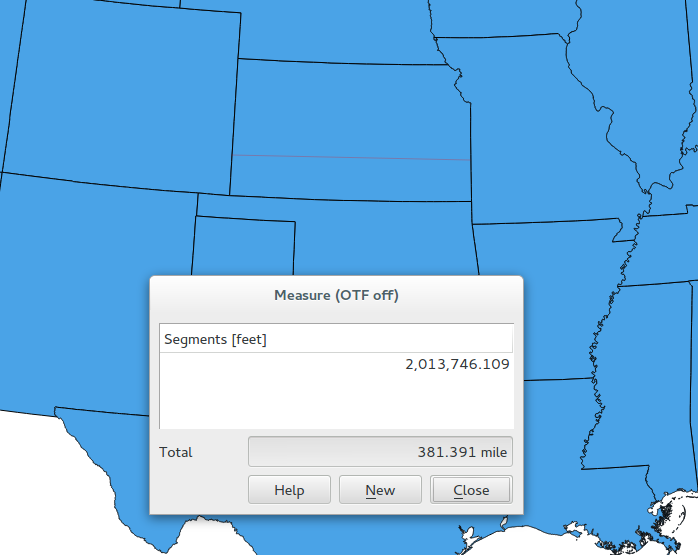

In [16]:
Image(filename='Images/lesson2_2.png')

 # <a id='step_2'></a>

## Step 2: Viewing Data Accurately

Now if we Tick the boxes for each layer in the **Layers** panel we see that the colour fill of the **NWS_CWA_Boundaries** layer blocks any information from the **State_Boundaries** below it, (you could have these layers reversed, in which case the State_Boundaries is overlaying the NWS_CWA_Boundaries, but it is essentially same conumdrum). We will deal with making one of these layer transparent and changing the line style to be able to discern which lines are State borders and which ones are County Warning Area (CWA) boundaries.

1. **Double Click** the **NWS_CWV_Boundaries** layer which will bring up the **Layer Properties** window, (we will just use this method from now on)
2. Select **Style**
3. In the **Symbol layers** panel click **Fill > Simple fill**
4. From the drop down menu titled **Symbol layer type** select **Outline: Simple line**
5. Change the **Color** and **Pen style** to your desired preference

Now uyou can experiment with the colors and styles of all the layers one at a time to see which gives you the best contrast and allows the viewer to identify features of the map.


# <a id='step_3'></a>

## Step 3: Selecting Data and Attributes

The feature that is seen as a point, line, or polygon on the map canvas contains two tyes of data:

1. Spatial data that tells us (and QGIS) the location of the feature
2. Text based data that descibes the characteristcs of the feature

This text based data is known in GIS programs as *'attributes'* and can be accessed two ways. Firstlt we will look at individual data points or features:

- Highlight the **State_Boundaries** layer in thr **Layers** panel

- Change the mouse pointer to the **Indentify Features** by either:
    1. The **Indentify Features** icon in the **Tools** toolbar
    2. Clicking **View > Identify Features**
    3. Keyboard shortcut **Ctrl+shift+i**

- Click on any US state, away from any of the cities, interstates, or tornado tracks

- A box will appear with some data about the point that you have selected

This bix can be enlarged by dragging the bottom right hand corner to view it larger. You will see a few lines of information that you may be to dicern what they represent. Better still is to expand the third line down (The one directly below **Name** and an option for **Veiw feature form** should appear. Clicking that line of text will open a form with informationabout the point you have selected. In this case we have seleted a point within a polygon representing a state, so you should now know which state is was, a few poices of other information. 

**Exercise:** 

You can now explore any point on your map canvas to see what information it holds. Here is the key though: if you want to see any data about any of the Tornado tracks, the **Tornado_tracks** layer *must* be highlighted in the **Layers** panel. Similarly for any of the information about cities, County Warning Areas, Interstates etc. 
        
 **Attribute Table:**
 
This first method provides enough information for casual investigations about data or features in your map, but a much more powerful way to dig deeper into the data files being interprted by QGIS is to delve into the **Attribute table**. This can be found two ways:

1. Right-Click on the layer in the **Layers** panel, and select **Open Attribute Table**
2. Highlight the layer you wish to investigate, and click **Layer > Open Attribute Table**

Once open it should look fairly familiar as a spreadsheet of data simalr to programs such as Microsoft Excel. To keep it simple chose the **States_Boundaries** first and a table listing the Each state will appear.

The features of the Attribute table can be explored by hovering over each icon to see thier description. The order of the rows can be change clicking on each heading, multiple clicks will change it to either ascending or descending order. Indiviual or multiple rows can be seleted by cliking on the far left column, whereby the entire row will become hightlighted. 

**Exercise:**

Select a single state from the list, highlight the row, and click on the **Show All Features** button and select **Show Selected Features**. Fron the icons at the top of the window select **Zoom map to selected area**, which is the icon f the magnifying glass. This will send the map canvas to the selected state, and give you the information in the data table about it. You do not need to only display the selected features, but narrowing down the list of data will make tasks easier in the furture. You should get an view similar to the example of Delaware below:

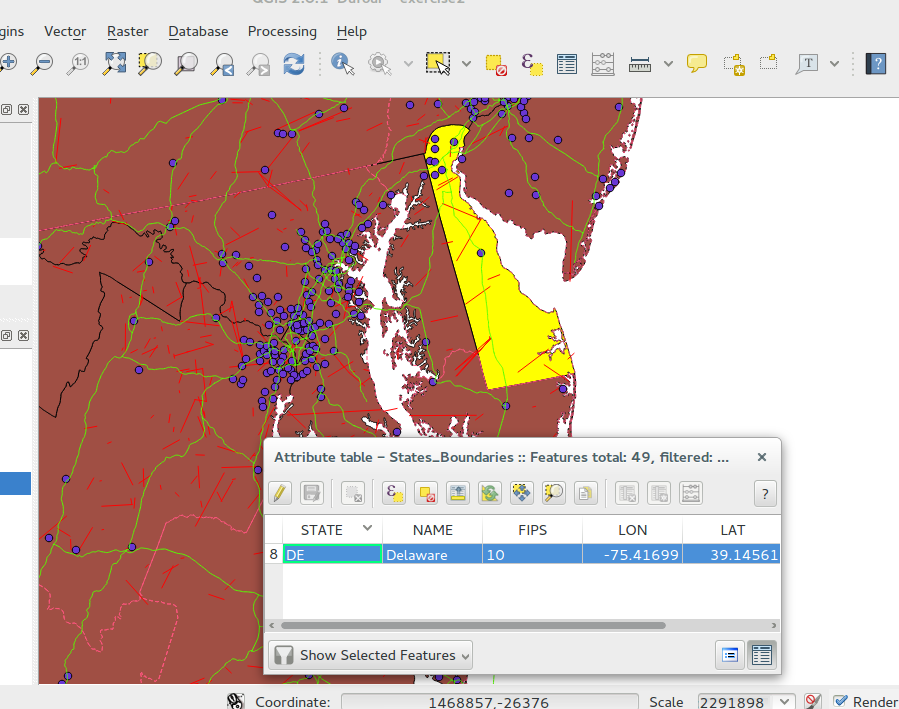

In [17]:
Image(filename='Images/lesson2_3.png')

**Note:** Make sure you click **Unselect all** or **Ctrl+U** otherwise the feature will stay hightlighted after you close the Attribute table window. 

# <a id='step_4'></a>

## Step 4: Larger Datasets and Data Queries

The more complex and powerful way to explore the data presented on the map canvas is to use the **Query Builder** to filter the data files for specific terms. Similar to any basic programming, we will use conditional statements to refine the selection of groups of data.

The Query Biulder can be found via **Layer > Query...** or **Right Click > Filter**. Simliar to the previous method the layer that you wish to investigate needs to be highlighted in the **Layers** panel.

The main reason for using this method is to be able to sort or filter a large amount of data, so lets open the Query Buildewr for the **Tornado_tracks** layer.

Once the Query Buider panel is open there are a few methods for inputting data, depending if you already know what you are looking for. Either:

1. Double click the keywords to insert them into the lower box, along with clicking a conditional operator
2. Type the terms you require if you already know how the data is stored

We will start with the long version since this will help the second method if typing terms in yourself, self explanatory.

- On the left hand side, pick a **Field** we wish to sort from, ie. Double click **YEAR**
- Below the **Values** box click **ALL**
- Click a conditional operator sign from the **Operators** panel, then choose a year form **Values** by double clicking a year

You should have a statement in the **Provider specific filter expression** box simlar to:

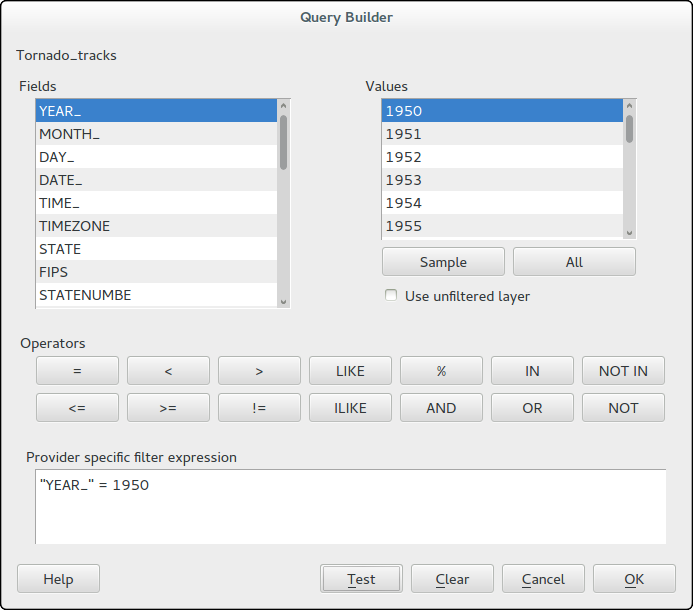

In [18]:
Image(filename='Images/lesson2_4.png')

Now you most likely recognise the similarity bewteen this method and serching Excel files, basic programming, or SQL etc, and once you know which keywords to use, then typing terms into the box becomes strightforward.

From here if you click **Test** the script will run and return how many values meet the conditional requirement, or if the syntax is incorrect for your search.

Once you click **OK**, then we return to the map canvas and only features matching the filter results will be shown. In the case of Tornadoes in 1950, there are only 95 out of the original 27608 that where present before. 

If you open the **Attribute table** you will see that the table now only contains those data points which have been filtered, and if you hover over the icon you will find one that is described as **Select features using an expression** which does the same thing as the Query builder.

Now you can refine your selection even more, or next time use the **Select by exprssion** window to make your query.

**Very Important:** Whichever way you filter or change the dataset (either through the Attribute table or the Query Builder), to see all the data again and remove any filters you **must use the same method to clear the filter!**.

In other words: you cannot clear the Query Builder from the Attribute table, and you cannot clear and Attribute table selection from the Query Builder. This could result in filters being applied to your data that you have forgotten about and therefore may make your results inaccurate.

You will most likley find the Query Builder easier to use and more powerful since it can show you search terms in the Values box. 

**Exercise:** Now you can apply filters to multiple layers and explore the more on the map canvas. ie. Have a look how close any Tornadoes got to State capitals in the yeat 2000.

*Hint:* Filter:
- US_cities > CAPTIAL=State
- Tornado_tracks > YEAR_2000 

# <a id='step_5'></a>

## Step 5: Using Spatial Query tools

So far for filtering data we have taken fairly basic steps, and we have done most of the work manually outside of QGIS organizing the spreadsheet of data. The final tool we will look at is what makes using a program such as QGIS so productive, and helps provide us information that we would otherwise not be able to visulaize, or that would take too long to filter by expressions alone.

The **Spatial Query** tool can be found in the **Vector** menu, or in **Vector > Research Tools > Select by location**. If you do not see it in either menu then open **Plugins > Manage and Install Plugins...** and enable the plugin by clicking its checkbox. 

Once you have the Spatial Query window open you should immediately see by the options it presents that this tool is very powerfull in the way it can filter data and features from on the map canvas. 

The Spatial Quesry tool operates on the entire array of data points for each of the layer you select - since we have seen that we can ammend the array of data in the attribute table by either the Query Builder or by Expressions, we can limit the amount of operations the Spatial Query tool has to do. 

For example: If you still have the Tornadoes layer filtered for only the year 2000, we can look at a query such as:

- Feature from **Torndoes_tracks** that **Crosses** reference features of **Interstates**.

If you click apply for this query, a few moments later you should get a window similar to:

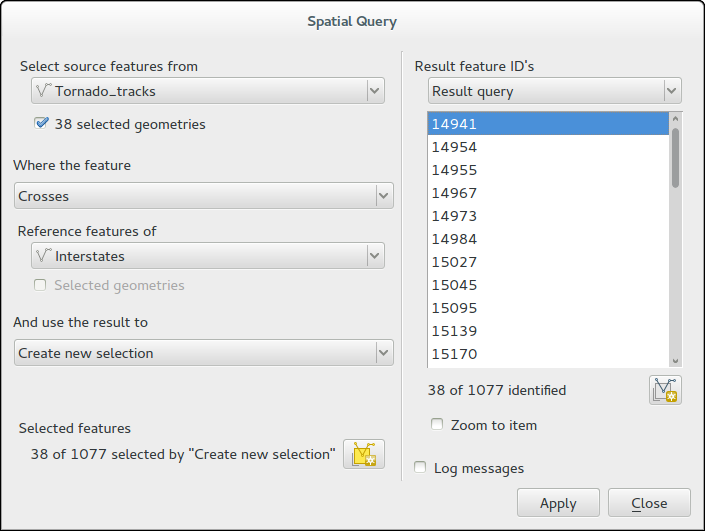

In [19]:
Image(filename='Images/lesson2_5.png')

Where the spatial query tool has only had to search through 1007 Tornado tracks (during the year 2000) rather than the full array of nearly 28,000.

As we can see, it has found 57 results that it arranges in a table. You should then always make sure you click on **Apply** as this weeds out any **invalid sources**, and leaves you with an array of robust data. In this case here are now 38 enteries:

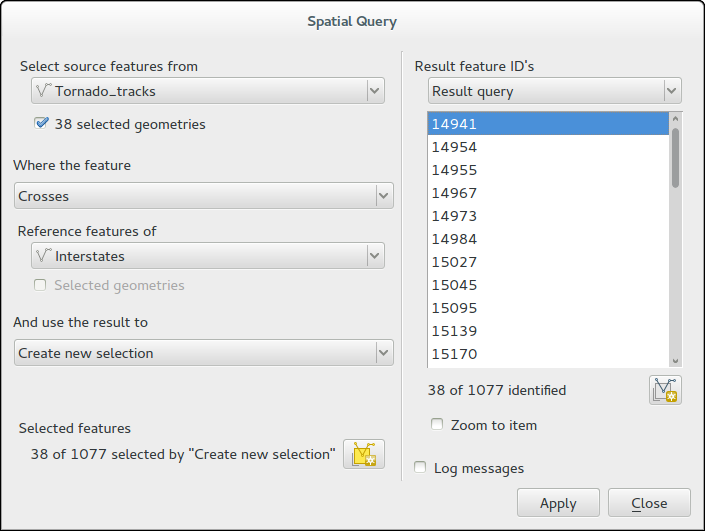

In [20]:
Image(filename='Images/lesson2_5.png')

You can select and view each entry on the map by clicking **Zoom to item**, or better yet we will **Create New Layer from list of items** from the icon just below the listed results.  

Seperating these data entries into a layer will allow us to manipulate the data as we have been with the other layers in regard to it Attribute table, style options, Layer order etc. 

**WARNING:** Narrowing your data array *before* using the Spatial Query Tool is highly recommended. Asking the system to search *every* Tornado track that has *ever* crossed an Interstate could result in the program crashing. Have a think about the amount of data you are asking the program to analyze before clicking **Apply**. 

Don't forget to remove the filter from the original layer's Query Builder as it will still only be showing Tornadoes the year 2000. 

# <a id='readings'></a>

## Suggested Readings

- [Introduction to Geodesy and Mapping](#https://www.meted.ucar.edu/training_module.php?id=1134#.Vz5EeJ6YreQ), MetEd Resources.
- Working with feature selection tools. "Learning QGIS" (Anita Graser). Pages 41 - 43

# <a id='references'></a>

## References

- Bruy, A.; Svidzinska, D.; *"QGIS By Example"*. Packt Publishing. 2015.

- Dobson, J.; Boehnert.; *"GIS Tutorial for Atmospheric Science"*. UCAR and UNC-Ashville. 2015.

- Graser, A.; *"Learning QGIS"*. Packt Publishing. 2015.

- Menke, K.; Smith, R.; Pirelli, L.; Von Hoesen, J.; *"Mastering QGIS"*. Packt Publishing. 2015.
